
Plotting top 15 Commentaire clusters (limited to top 10 Type values each)...


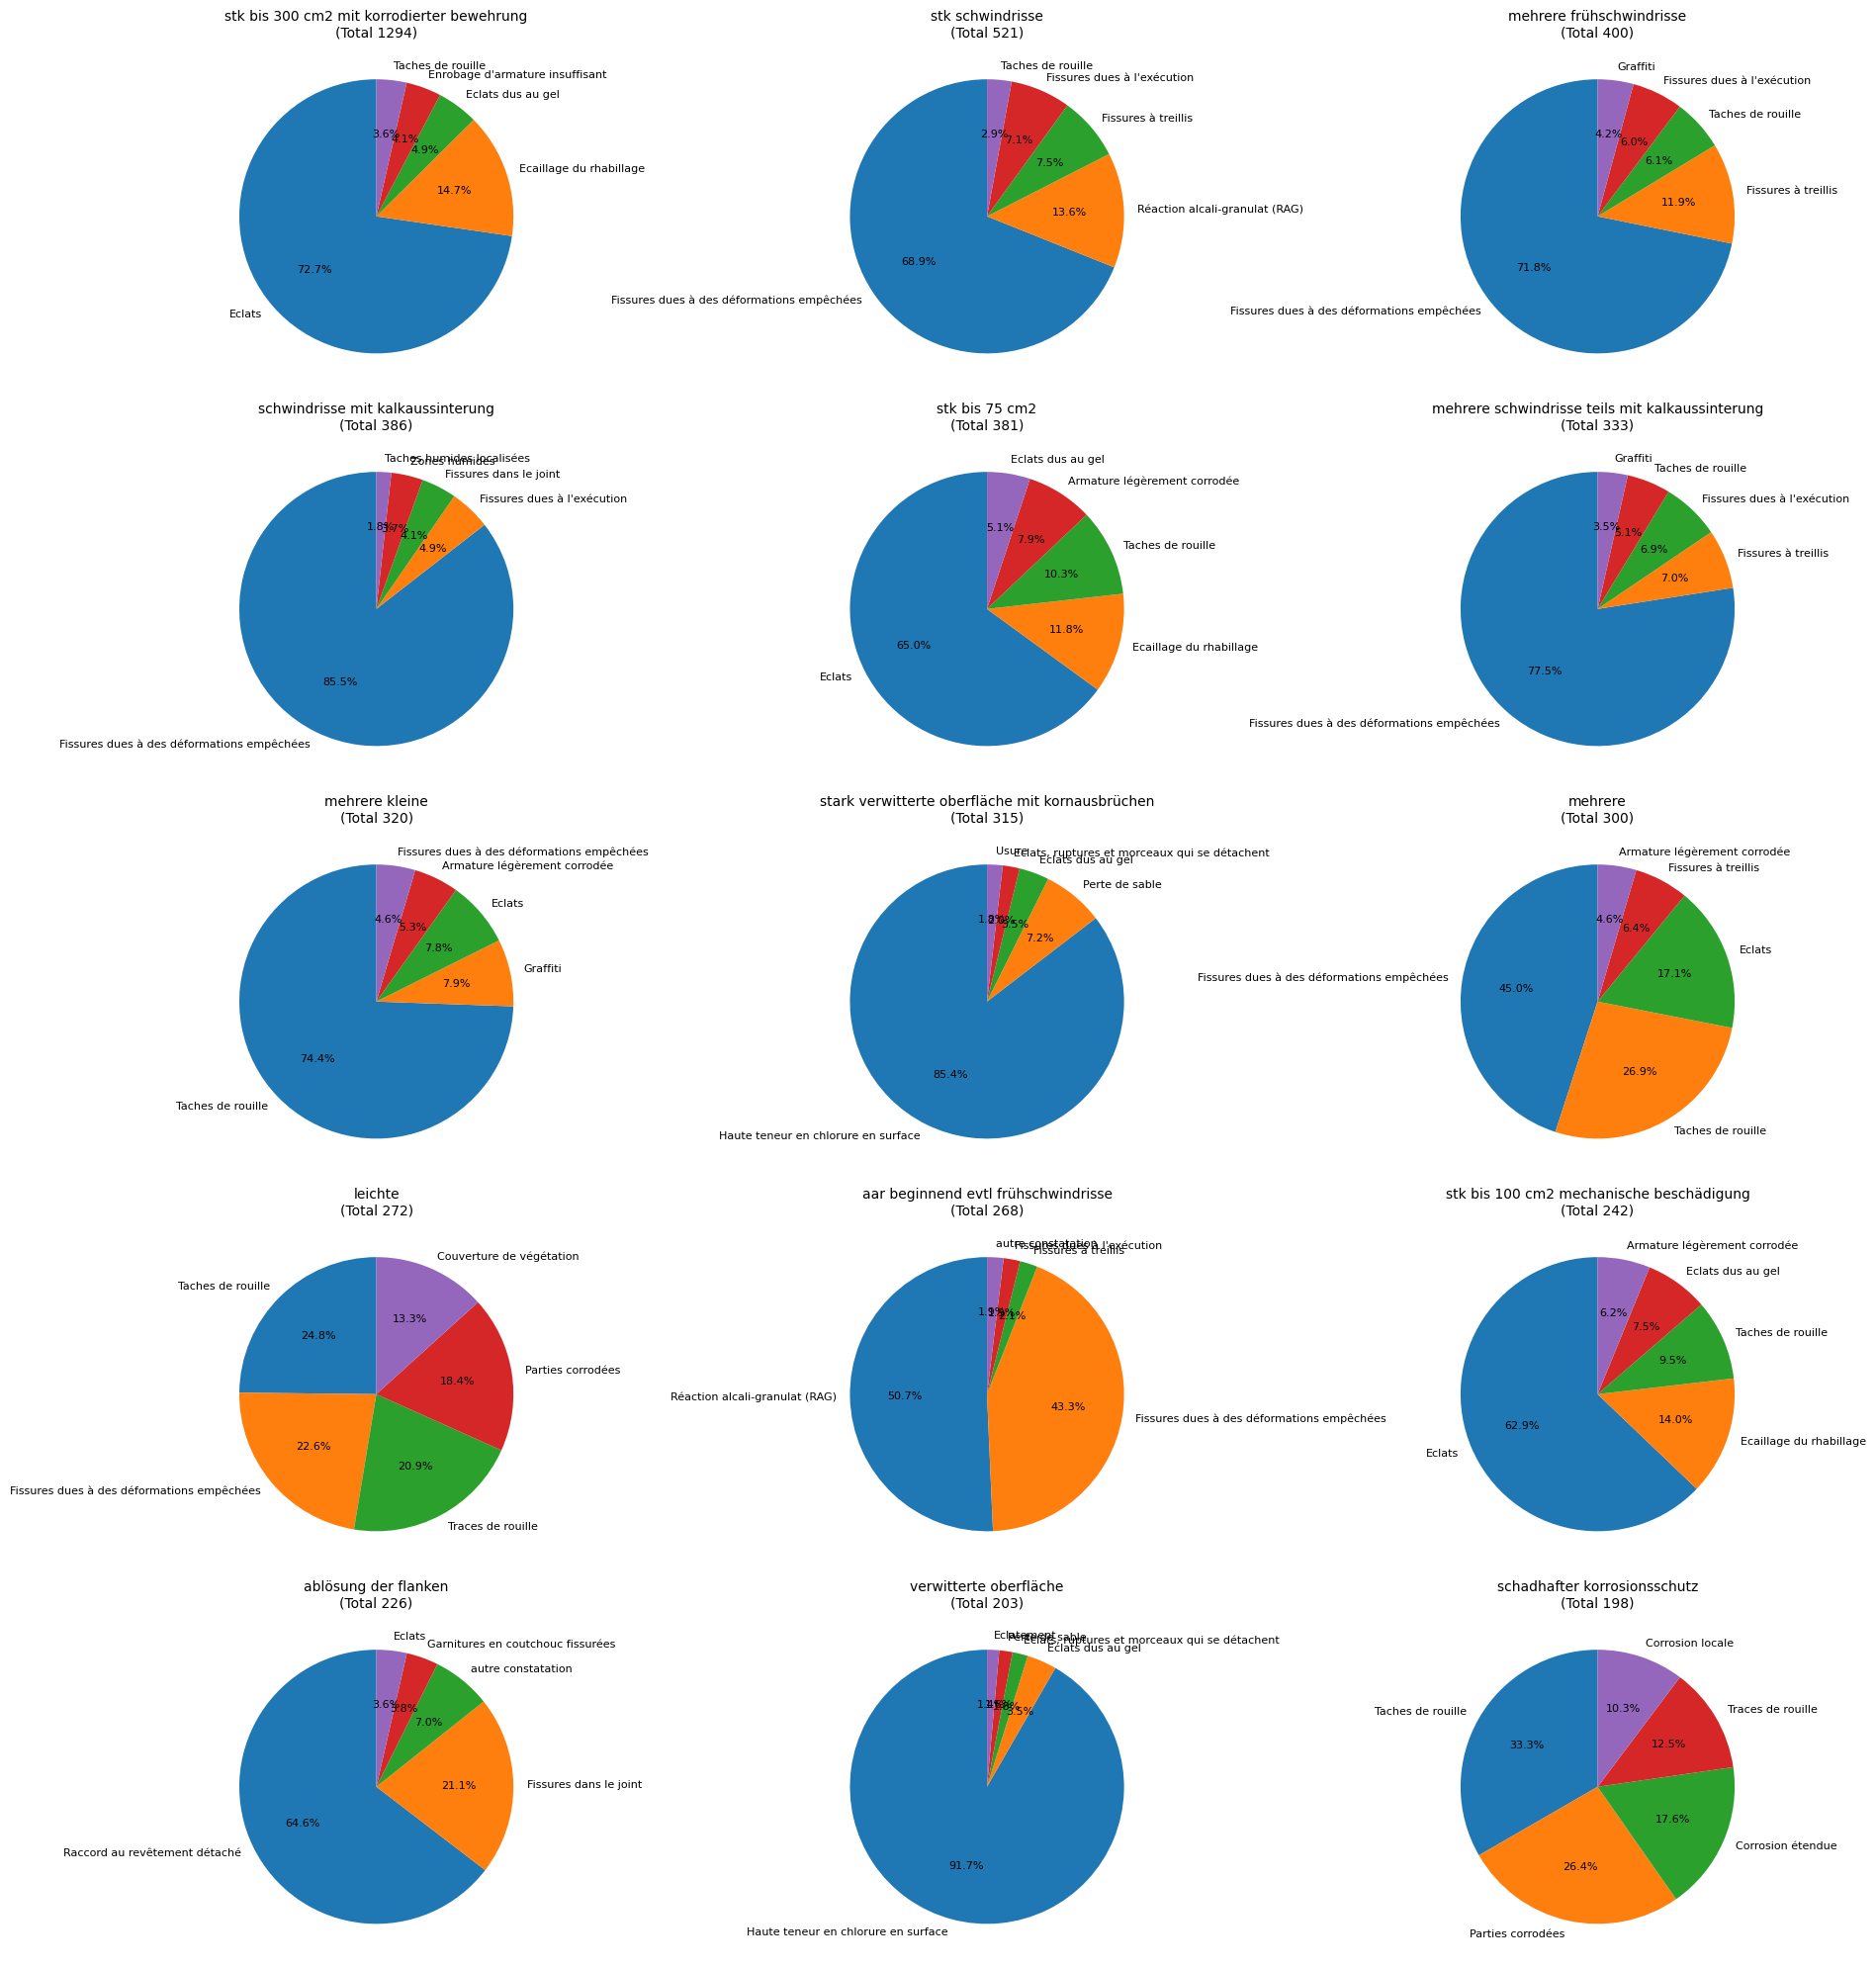

Saved 'top15_commentaire_type_pies_top5.png'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
corr_file = "commentaire_type_correlations_fulltext.csv"
max_types_per_pie = 5

# ---------- LOAD CORRELATION RESULTS ----------
corr_df = pd.read_csv(corr_file, sep=";")
if corr_df.empty:
    raise ValueError("No correlation data found. Run the main computation script first.")

# ---------- PLOT ----------
print("\nPlotting top 15 Commentaire clusters (limited to top 10 Type values each)...")

top_clusters = (
    corr_df.groupby("Commentaire_Cluster")["Commentaire_Count"]
    .max()
    .sort_values(ascending=False)
    .head(15)
    .index
)

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for i, cluster in enumerate(top_clusters):
    ax = axes[i]
    subset = corr_df[corr_df["Commentaire_Cluster"] == cluster]
    subset = subset.sort_values(by="Type_Count", ascending=False).head(max_types_per_pie)

    sizes = subset["Type_Count"]
    labels = subset["Type_Value"].astype(str).str.slice(0, 50)

    ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, textprops={"fontsize": 8})
    title = cluster[:60] + ("..." if len(cluster) > 60 else "")
    ax.set_title(f"{title}\n(Total {subset['Commentaire_Count'].iloc[0]})", fontsize=10)

# remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("top15_commentaire_type_pies_top5.png", dpi=300)
plt.show()

print("Saved 'top15_commentaire_type_pies_top5.png'.")
